### Search for the Generated Data 
#### Visualize components of the Pewlett Hackard Dataset
#### Determine if data provided is likely to be actually company data or a generated dataset for testing


In [1]:
import pandas as pd 
import os
import pyodbc
from sqlalchemy import create_engine
import sqlalchemy as db
import matplotlib.pyplot as plt
import random as np
from config import User

In [2]:
# Create connection to the database
cestring = f'{User}PHEmpDB'
engine = create_engine(cestring)
connection = engine.connect()

### Primary Method
#### Pull in each table from the database one at and time an join them in pandas Data Frame
### Employee Table

In [9]:
# Define variable and get data from db table 
metadata = db.MetaData()
DataIn = db.Table('employees', metadata, autoload=True, autoload_with=engine)

# Define and call query / Get results and assign to a variable 
query = db.select([DataIn])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

# Build Data Frame from query results variable and give it column names from the database
Employees = pd.DataFrame(ResultSet)
Employees.columns = ResultSet[0].keys()
Salary.isnull().values.any()

False

### Repeat process for Salary Table 

In [7]:
# Define variable and get data from db table 
metadata = db.MetaData()
DataIn = db.Table('salary', metadata, autoload=True, autoload_with=engine)

# Define and call query / Get results and assign to a variable 
query = db.select([DataIn])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()
ResultSet[:5]

# Build Data Frame from query results variable and give it column names from the database
Salary = pd.DataFrame(ResultSet)
Salary.columns = ResultSet[0].keys()
Salary.isnull().values.any()

False

### Repeat process for Title Table 

In [8]:
# Define variable and get data from db table 
metadata = db.MetaData()
DataIn = db.Table('titles', metadata, autoload=True, autoload_with=engine)

# Define and call query / Get results and assign to a variable 
query = db.select([DataIn])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()
ResultSet[:5]

# Build Data Frame from query results variable and give it column names from the database
Title = pd.DataFrame(ResultSet)
Title.columns = ResultSet[0].keys()
Title.isnull().values.any()

False

In [6]:
# Convert the string salary to numbers that can be plotted
# When table was created cast salary as money, step to demoneyfy
Salary['salary'] = Salary['salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)

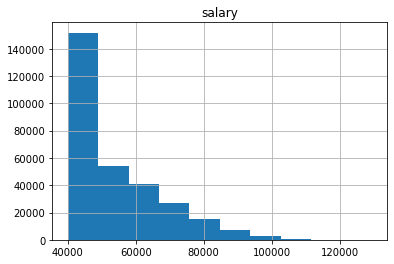

In [7]:
# Display Salary Histogram 
Salary.hist(column='salary');

### Salary Analysis 
####  While it is not unusual for salary ranges to skew to the low range, the lack of any low range compensation seems suspicious. It is possible that this company has a policy of minimum salaries (like that attempted by Ben and Jerry's), which could explain this result. Question like why are there no salaries under $40,000 would need to be asked.

Note: These salary numbers reach back to the mid 80's and Ben and Jerry's minimum salary for 2020 was $37,710.40, and even this number falls below the lowest salary reported by our company. 

In [8]:
# Merge titles and salaries to Employees
EByS = pd.merge(Employees, Salary, on='emp_no')
SByT = pd.merge(EByS, Title, on='emp_title_id')

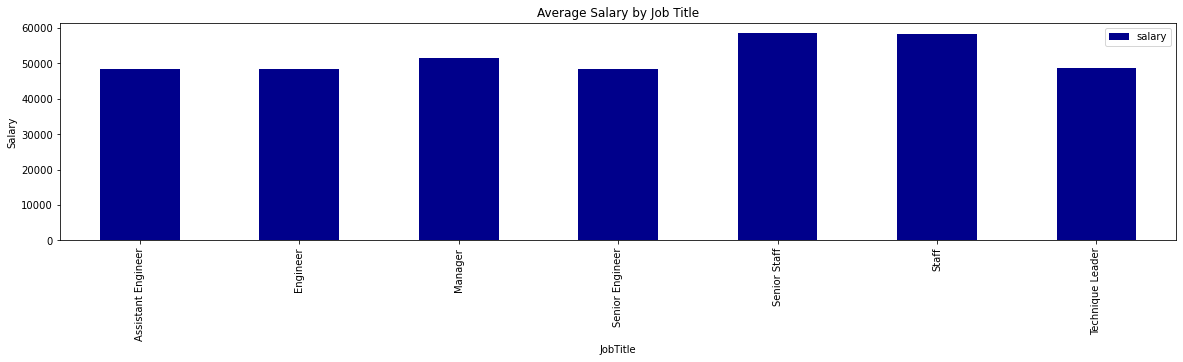

In [9]:
# Get average Salary by Title 
SalaryByTitle = pd.DataFrame(SByT.groupby('title')['salary'].mean())

# plot average salaries 
SalaryByTitle.plot(xlabel="JobTitle", ylabel="Salary", kind="bar", figsize=(20,4), color='darkblue')
plt.title('Average Salary by Job Title');

###  Salary by Title Analysis 
#### This is unlikely to be real data. The bar chart above shows that all job title with the word engineer in them have the same average salary. This is repeated for the staff roles. It is not resonable that a an assistant engineer would have a salary on par with a senior engineer. It is safe to say if this were to be an accurate dataset, the company in question needs to reevaluate its compensation policies. 

## Alternate Method
#### Let SQL do the heavy lifting - Bring the already merged data in from a view
The view is just another table in the database for our SQLalchemy purposes.  In this case it combines the three tables we need to look at for our analysis, and strips out most of the unneeded columns. I kept first and last name for my own readibility purposes but they are not required for the analysis. 

In [10]:
# Define variable and get data from db table 
metadata = db.MetaData()
DataIn = db.Table('SalaryTitle_view', metadata, autoload=True, autoload_with=engine) ## no key 

# Define and call query / Get results and assign to a variable 
query = db.select([DataIn])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

# Build Data Frame from query results variable and give it column names from the database
SalaryandTitle = pd.DataFrame(ResultSet)
SalaryandTitle.columns = ResultSet[0].keys()
SalaryandTitle.isnull().values.any()

False

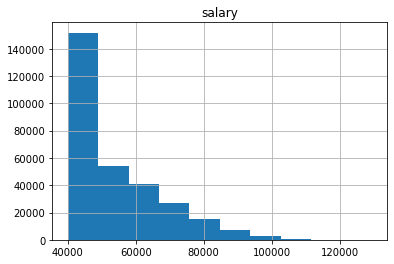

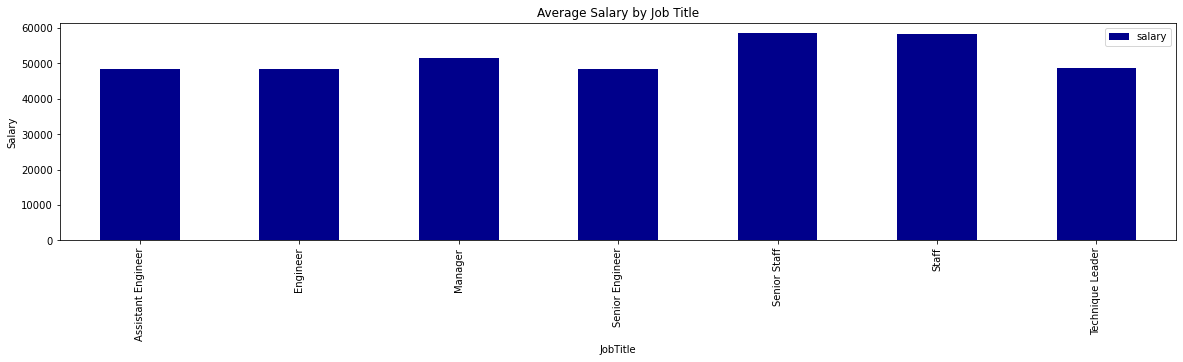

In [11]:
# Convert the string salary to numbers that can be plotted
# When table was created cast salary as money, step to demoneyfy
SalaryandTitle['salary'] = SalaryandTitle['salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display Salary Histogram 
SalaryandTitle.hist(column='salary');
# Get average Salary by Title 
SalaryByTitle = pd.DataFrame(SalaryandTitle.groupby('title')['salary'].mean())

# plot average salaries 
SalaryByTitle.plot(xlabel="JobTitle", ylabel="Salary", kind="bar", figsize=(20,4), color='darkblue')
plt.title('Average Salary by Job Title');